# K-means clustering

## Exploratory data analysis: mall customer segmentation data (kaggle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv("The Muggle Sorting Hat DataSet.csv")
df1["Gender"] = df1["Gender"].str.replace(" ", "")
df1["District"] = df1["District"].str.replace(" ", "")
df1["Name"] = df1["Name"].str.replace(" ", "")
df1["Friend 1"] = df1["Friend 1"].str.replace(" ", "")
df1["Friend 2 "] = df1["Friend 2 "].str.replace(" ", "")
df1.rename(columns = {"Friend 2 ":"Friend 2"}, inplace = True)
df1.head()

,Name,Gender,Age,District,Friend 1,Friend 2
0,BettyAllison,female,10,Pandora,MollyMeer,JessicaZebra
1,PeterAlexs,male,10,Limsa,G�ntherCohl,CeasarFeige
2,GregorAllmann,male,11,Pandora,BertEdamer,CeasarFeige
3,TiffanyBecks,female,10,Pandora,AllyInka,SallyBrot
4,SallyBrot,female,10,Limsa,TiffanyBecks,BettyAllison


In [2]:
#df1.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
#df1.head()

In [3]:
df1.describe()

,Age
count,80.000000
mean,10.112500
std,0.317974
min,10.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,11.000000


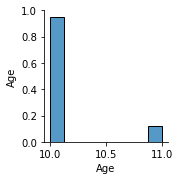

In [4]:
sns.pairplot(df1[["Age", "District", "Gender"]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      41
female    39
Name: Gender, dtype: int64

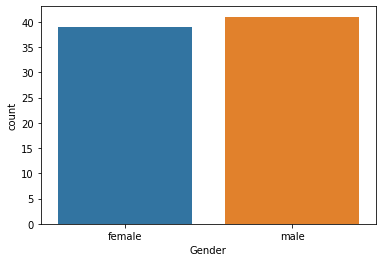

In [5]:
sns.countplot(df1["Gender"])
df1["Gender"].value_counts()

In [6]:
df1["District"].value_counts()

Pandora       19
Uldah         17
Limsa         15
Queensdale    11
Gridania      11
Reach          7
Name: District, dtype: int64

In [7]:
dic = {"Pandora" : "0", "Uldah" : "1", "Limsa" : "2", "Queensdale" : "3", "Gridania" : "4", "Reach" : "5"}
dic2 = {"female" : "0", "male" : "1"}

for old, new in dic.items():
    df1['District'] = df1['District'].str.replace(old, new, regex=False)

for old, new in dic2.items():
    df1['Gender'] = df1['Gender'].str.replace(old, new, regex=False)

df1['District'] = df1['District'].astype(int)
df1['Gender'] = df1['Gender'].astype(int)

In [8]:
df1.head()
df1["Gender"].value_counts()

1    41
0    39
Name: Gender, dtype: int64

## Clustering mall customer segmentation data

In [9]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df1[["District", "Gender"]])
kmeans.cluster_centers_

array([[ 7.72727273e-01,  7.27272727e-01],
       [ 4.38888889e+00,  5.55555556e-01],
       [ 2.33333333e+00,  1.00000000e+00],
       [-2.22044605e-16, -1.11022302e-16],
       [ 2.54545455e+00, -1.11022302e-16]])

In [10]:
df1["Clusters"] = kmeans.labels_
df1.head(10)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
1,PeterAlexs,1,10,2,G�ntherCohl,CeasarFeige,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,0
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
4,SallyBrot,0,10,2,TiffanyBecks,BettyAllison,4
5,NancyClick,0,11,1,ZoeJutter,AmandaFredericks,0
6,G�ntherCohl,1,10,1,CeasarFeige,PeterAlexs,0
7,JohnnyCedar,1,10,4,MarvinGeige,LeoJackson,1
8,MathildaDamm,0,10,2,YuleHoffnung,ZoeJutter,4
9,BertEdamer,1,10,1,PeterAlexs,G�ntherCohl,0


In [11]:
df1["Clusters"].value_counts()

0    22
1    18
2    15
3    14
4    11
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='District'>

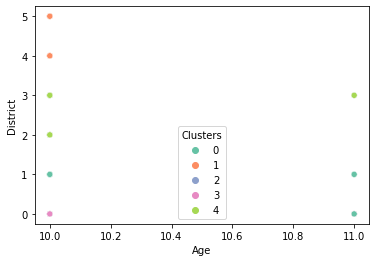

In [12]:
sns.scatterplot(data = df1, x = "Age", y = "District", hue = "Clusters", palette = "Set2")

## Creating diverse customer groups

In [13]:
"""
First function creates list a of clustered dataframes (one df per cluster); second function takes list a,
splits clustered dataframes into required number of diverse groups (splits) and adds them to list b; third function 
combines splitted dataframes in list b into new (diverse) dataframes and adds them to list c.
"""
from functools import reduce

def create_clustered_dataframes(df):
    dataframes = []
    for i in df.Clusters.unique():
        temporary_df = df[df["Clusters"] == i]
        dataframes.append(temporary_df)
    return dataframes

clustered_dataframes = create_clustered_dataframes(df1)
clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,3
19,YuleHoffnung,0,10,0,ZoeJutter,AmandaFredericks,3
22,ZoeJutter,0,10,0,YuleHoffnung,SallyBrot,3
38,MollyMeer,0,11,0,MillyMucks,BettyAllison,3
40,MillyMucks,0,10,0,KatrinGreat,SandraNox,3
44,AlexaNymm,0,10,0,StacyNymm,VeraNyoa,3
45,StacyNymm,0,11,0,SteffieHorcrux,MathildaDamm,3


In [14]:
def split_dataframes(clustered_list, splits):
    dataframes_split = []
    for i in clustered_list: 
        index_to_split = (-(-len(i)//splits))
        start = 0
        end = index_to_split
        for split in range(splits):
            temporary_df = i.iloc[start:end, :]
            dataframes_split.append(temporary_df)
            start += index_to_split
            end += index_to_split
    return dataframes_split

split_clustered_dataframes = split_dataframes(clustered_dataframes, 5)
split_clustered_dataframes[0]

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3


In [15]:
"""
Splits in split_dataframes_by_position has to be the same as splits in create_diverse_dataframes!
"""

def create_diverse_dataframes(split_list, splits):
    dataframes_diverse = []
    start = 0
    for split in range(splits):        
        if start <= splits - 1:
            new_dataframe_as_list = split_list[start::splits]
            new_dataframe = pd.concat(new_dataframe_as_list)
            dataframes_diverse.append(new_dataframe)
            start += 1
    return dataframes_diverse    
    
diverse_groups = create_diverse_dataframes(split_clustered_dataframes, 5)
diverse_groups[0].head(15)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
1,PeterAlexs,1,10,2,G�ntherCohl,CeasarFeige,2
11,CeasarFeige,1,10,2,G�ntherCohl,BertEdamer,2
16,SebastianGuerrero,1,10,3,CarlosVives,HermanKaas,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,0
5,NancyClick,0,11,1,ZoeJutter,AmandaFredericks,0
6,G�ntherCohl,1,10,1,CeasarFeige,PeterAlexs,0
9,BertEdamer,1,10,1,PeterAlexs,G�ntherCohl,0


## Visualising diverse groups

In [16]:
group = diverse_groups[0]
#sns.scatterplot(data = group, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

In [17]:
for group_temp in diverse_groups:
    print(group_temp["Clusters"].value_counts())
    print(len(group_temp))

0    5
1    4
2    3
3    3
4    3
Name: Clusters, dtype: int64
18
0    5
1    4
2    3
3    3
4    3
Name: Clusters, dtype: int64
18
0    5
1    4
2    3
3    3
4    3
Name: Clusters, dtype: int64
18
0    5
1    4
2    3
3    3
4    2
Name: Clusters, dtype: int64
17
2    3
0    2
1    2
3    2
Name: Clusters, dtype: int64
9


Problem: Groups are too different in size!

## Creating diverse customer groups (different approach)

In [18]:
def sort_dataframe(df):
    df["Clusters"] = pd.Categorical(df["Clusters"], [0, 1, 2, 3, 4])
    sorted_dataframe = df.sort_values("Clusters")
    return sorted_dataframe

sort_dataframe(df1).head()

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
62,IndiPyrre,1,10,0,ArnoKrys,DavePulps,0
37,XanderMadrigal,1,10,1,ErnestoMadrigal,BillyNozzle,0
36,ErnestoMadrigal,1,10,1,XanderMadrigal,KevinNicks,0
34,BibiLydda,0,11,1,MaxieLooks,CiciLydda,0
33,CiciLydda,0,10,1,BibiLydda,MaxieLooks,0


## Keeping two customers together: merging rows before clustering
    

In [19]:
df2 = df1.drop("Clusters", axis=1)

def merge_customers1(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    average_age = (customer1.iloc[0,2] + customer2.iloc[0,2])/2
    average_income = (customer1.iloc[0,3] + customer2.iloc[0,3])/2
    average_spending_score = (customer1.iloc[0,4] + customer2.iloc[0,4])/2
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [average_age],
                                      "Income": [average_income],
                                      "Spending Score": [average_spending_score]})
    return merged_c


merge_customers1(df2, 1, 2)

KeyError: 'CustomerID'

In [21]:
def merge_customers2(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    age = [customer1.iloc[0,2], customer2.iloc[0,2]]
    income = [customer1.iloc[0,3], customer2.iloc[0,3]]
    spending_score = [customer1.iloc[0,4], customer2.iloc[0,4]]
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [age],
                                      "Income": [income],
                                      "Spending Score": [spending_score]})
    return merged_c


#merge_customers2(df2, 1, 200)

In [23]:
df4 = pd.DataFrame()
#for number in range(1, 101):
    #df_temp = df4.append(merge_customers1(df2, number, 100+number))
    #df4 = df_temp
print(df4)
print(len(df4))

Empty DataFrame
Columns: []
Index: []
0


In [25]:
#sns.pairplot(df4[["Age", "Income", "Spending Score"]])

When we try to cluster the new dataframe with merged customers, the original clusters are practically gone. But merged school children will have more in common (same previous school, probably gender) so may belong to the same cluster? Should we think about categorising values to create clusters?

## Clustering students based on network communities

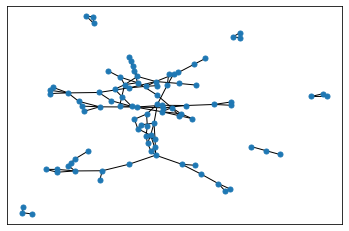

In [26]:
import networkx as nx

G_symmetric = nx.Graph()

for index, row in df1.iterrows():
    G_symmetric.add_edge(row["Name"], row["Friend 1"])
    G_symmetric.add_edge(row["Name"], row["Friend 2"])

nx.spring_layout(G_symmetric)
nx.draw_networkx(G_symmetric, node_size = 25, with_labels = False)

The following bit of code allows us to extract clusters/communities of people:

In [44]:
from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(G_symmetric))

sorted(c[1])

['AlexaNymm',
 'AllyInka',
 'AmandaFredericks',
 'JessieSnape',
 'LisaSanta',
 'MathildaDamm',
 'NancyClick',
 'SallyBrot',
 'StacyNymm',
 'StefanieFluss',
 'TiffanyBecks',
 'VeraNyoa',
 'YuleHoffnung',
 'ZoeJutter']

(It should be possible to get smaller communities by using the "resolution" parameter (greedy_modularity_communities(G_symmetric, resolution = 1)), but for some reason it kept throwing errors...)

In [28]:
def merge_students(df, list_sets):
    list_df = []
    for set_students in list_sets:
        mask = df["Name"].isin(set_students)
        df_set = df.loc[mask]
        temp_df = pd.DataFrame({"Name": [set_students],
                                "Number of Students": [len(set_students)],
                                "Gender": [round(df_set["Gender"].mean(), 1)],
                                "Age": [round(df_set["Age"].mean(), 1)],
                                "District": [round(df_set["District"].mean(), 1)]})
        list_df.append(temp_df)
    merged_communities = pd.concat(list_df, ignore_index=True)
    return merged_communities
        
df_merged_students = merge_students(df1, c)
df_merged_students


,Name,Number of Students,Gender,Age,District
0,"(BrentPhil, SanderPendeln, KevinNicks, ZackObe...",14,1.0,10.0,1.7
1,"(ZoeJutter, TiffanyBecks, MathildaDamm, AllyIn...",14,0.0,10.2,0.9
2,"(CeasarFeige, PeterAlexs, JohnnyCedar, MarvinG...",12,1.0,10.1,2.7
3,"(TheaRekle, AnnaMag, GeorgiaPammen, AnnaKrulle...",11,0.0,10.1,2.1
4,"(SteveQuarter, VictorSalat, WolterPlop, IndiPy...",10,1.0,10.2,1.7
5,"(SebastianGuerrero, BobRekon, PhilRookie, Carl...",9,1.0,10.0,2.8
6,"(KatrinGreat, SandraNox, MillyMucks, MollyMeer...",6,0.0,10.2,1.0
7,"(ShirleyTemple, FrederikeGaal, SteffieHorcrux)",3,0.0,10.0,2.0
8,"(BryanGyllenhaal, Moritz, SanderProof)",3,1.0,10.0,4.0
9,"(StephanieLanse, Maxie, Caroline)",3,0.0,10.0,3.0


I think the next step would be using k-means clustering to cluster groups of students (instead of individuals as we did before) and then form diverse groups as we did with the customer dataset earlier. I haven't yet figured out how to make sure that we'll have similar class sizes in the end, so classes containing around 25-30 students each (edit: I think that's a problem called bin packing). I'd suggest that I'll work on that next week (always provided that you think network clustering + k-means clustering sounds like a good approach...)

## k-means clustering of student groups

In [29]:
kmeans = cluster.KMeans(n_clusters = 8, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df_merged_students[["District", "Gender"]])
kmeans.cluster_centers_

array([[0.96666667, 0.        ],
       [4.        , 0.        ],
       [1.7       , 1.        ],
       [2.05      , 0.        ],
       [5.        , 0.        ],
       [2.75      , 1.        ],
       [4.        , 1.        ],
       [3.        , 0.        ]])

In [30]:
df_merged_students["Clusters"] = kmeans.labels_
df_merged_students.head(11)

,Name,Number of Students,Gender,Age,District,Clusters
0,"(BrentPhil, SanderPendeln, KevinNicks, ZackObe...",14,1.0,10.0,1.7,2
1,"(ZoeJutter, TiffanyBecks, MathildaDamm, AllyIn...",14,0.0,10.2,0.9,0
2,"(CeasarFeige, PeterAlexs, JohnnyCedar, MarvinG...",12,1.0,10.1,2.7,5
3,"(TheaRekle, AnnaMag, GeorgiaPammen, AnnaKrulle...",11,0.0,10.1,2.1,3
4,"(SteveQuarter, VictorSalat, WolterPlop, IndiPy...",10,1.0,10.2,1.7,2
5,"(SebastianGuerrero, BobRekon, PhilRookie, Carl...",9,1.0,10.0,2.8,5
6,"(KatrinGreat, SandraNox, MillyMucks, MollyMeer...",6,0.0,10.2,1.0,0
7,"(ShirleyTemple, FrederikeGaal, SteffieHorcrux)",3,0.0,10.0,2.0,3
8,"(BryanGyllenhaal, Moritz, SanderProof)",3,1.0,10.0,4.0,6
9,"(StephanieLanse, Maxie, Caroline)",3,0.0,10.0,3.0,7


<AxesSubplot:xlabel='Gender', ylabel='District'>

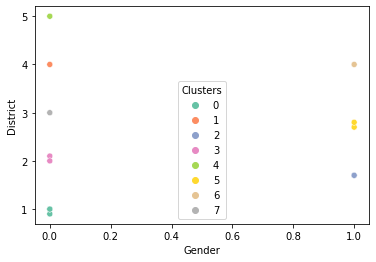

In [31]:
sns.scatterplot(data = df_merged_students, x = "Gender", y = "District", hue = "Clusters", palette = "Set2")

In [56]:
list_df_clustered_students = create_clustered_dataframes(df_merged_students)
list_df_clustered_students[0]

,Name,Number of Students,Gender,Age,District,Clusters
0,"(ZackOber, BerndMolen, AdamPeggie, FrankRingo,...",14,1.0,10.0,1.7,2
4,"(ArnoKrys, NewtScamander, VictorSalat, Alexand...",10,1.0,10.2,1.7,2


In [39]:
import binpacking

b = {'a':10, 'b':10, 'c':11, 'd':1, 'e':2,'f':7}
bins = binpacking.to_constant_bin_number(b,4) # 4 being the bin number
print(bins)

[{'c': 11}, {'a': 10}, {'b': 10}, {'f': 7, 'e': 2, 'd': 1}]


In [40]:
b = list(b.values())
bins = binpacking.to_constant_volume(b,11) # 11 being the bin volume
print(bins)

[[11], [10, 1], [10], [7, 2]]
